#Classification MLP using the **Sequential API**

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets

###Download Data

In [2]:
fashion_mnist = datasets.fashion_mnist
(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
x_train_full.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

The difference of dowloading the dataset using tensorflow instead of scikit learn is that the image are rapresented as a 28x28 matric instead of a 1D vector, and the pixel intensities are integer instead of floats.

###Create a validation set
also rescale the features and convert to floats

In [4]:
x_val, x_train = x_train_full[:5_000]/255., x_train_full[5_000:]/255. 
y_val, y_train = y_train_full[:5_000], y_train_full[5_000:]

We need the list of classes to know what we are dealing with

In [5]:
class_names = ["T-shirt","Trousers","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bg","Ankle boot"]

In [6]:
import matplotlib.pyplot as plt

'Coat'

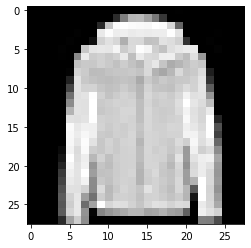

In [7]:
plt.imshow(x_train[0], cmap = "gray")
class_names[y_train[0]]

##Create the model using Sequential API

In [8]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten,InputLayer

In [10]:
model = Sequential([
  Flatten(input_shape = [28,28]),
  Dense(units=300, activation="relu", name = "dense_1"),
  Dense(units=100, activation="relu"),
  Dense(units=10, activation="softmax"),
])

Flatten is used as a sort of "preprocessing" step to convert 2D data into 1D.
Softmax let us interpret the output as a probability distribution over the 10 classes.

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 300)               235500    
                                                                 
 dense_2 (Dense)             (None, 100)               30100     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


Access layers

In [12]:
model.layers

In [13]:
model.get_layer("dense_1").name

'dense_1'

Get parameters from a layer

In [14]:
weights, bias = model.layers[1].get_weights()

weights.shape, bias.shape

((784, 300), (300,))

##Compiling the model

In [15]:
model.compile(optimizer = "sgd", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

We can use categorical_crossentropy if we use one-hot target ecnoding

In [16]:
from tensorflow import keras 

In [17]:
y_test = keras.utils.to_categorical(y_test)
y_val = keras.utils.to_categorical(y_val)
y_train = keras.utils.to_categorical(y_train) 

In [18]:
model.compile(optimizer = "sgd", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [19]:
history = model.fit(x_train,y_train, validation_data= (x_val,y_val), epochs=10)

Epoch 1/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7164 - accuracy: 0.7702 - val_loss: 0.5430 - val_accuracy: 0.8058
Epoch 2/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4881 - accuracy: 0.8304 - val_loss: 0.4433 - val_accuracy: 0.8542
Epoch 3/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4457 - accuracy: 0.8438 - val_loss: 0.4229 - val_accuracy: 0.8550
Epoch 4/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4185 - accuracy: 0.8551 - val_loss: 0.4043 - val_accuracy: 0.8620
Epoch 5/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3975 - accuracy: 0.8591 - val_loss: 0.3885 - val_accuracy: 0.8608
Epoch 6/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3821 - accuracy: 0.8653 - val_loss: 0.3778 - val_accuracy: 0.8686
Epoch 7/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3680 - accuracy: 0.8700 - val_loss: 0.3755 - val_accuracy:

##Let's plot learning curves

In [20]:
import pandas as pd

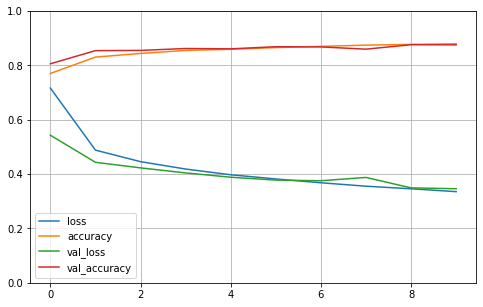

In [21]:
pd.DataFrame(history.history).plot(figsize= (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

##Make predictions

In [23]:
import numpy as np

In [24]:
x_new = x_test[:3]
y_new = y_test[:3]
y_new = [np.argmax(instance) for instance in y_new]

In [25]:
y_pred = model.predict(x_new)
y_pred = [np.argmax(instance) for instance in y_pred]

Check if predictions of new instances are equal to the correct labels.

In [26]:
[class_names[i] for i in y_pred]

['Ankle boot', 'Pullover', 'Trousers']

In [27]:
[class_names[i] for i in y_new]

['Ankle boot', 'Pullover', 'Trousers']

#Regression MLP using the **Sequential API**

We are going to use the california housing dataset from scikit learn, since it is simple to deal with, in fact it only contains numerical features and no missing values.

In [33]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

###Download the dataset

In [38]:
california_housing = fetch_california_housing()
scaler = StandardScaler()

In [48]:
x_train_full, x_test, y_train_full, y_test = train_test_split(california_housing["data"],california_housing["target"])

  Let's create a validation set

In [49]:
x_train, x_val, y_train, y_val = train_test_split(x_train_full,y_train_full)

###Standardization

In [50]:
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)

Since we want to predict a single real value, we should have a single neuron in output with no activation fucntion, so it is allowed to output any number without costraints.
We use less neurons and layers than before because the dataset is quite noisy, and we risk to overfitt

In [73]:
model = Sequential([
  Dense(units = 30, activation= "relu", input_shape = x_train.shape[1:]),
  Dense(1)
])

In [74]:
model.compile(loss = "mean_squared_error", optimizer = "sgd")

In [82]:
history = model.fit(x_train,y_train, validation_data = (x_val,y_val),epochs = 10)

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4050 - val_loss: 0.3928
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4066 - val_loss: 0.3938
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3986 - val_loss: 0.3906
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3949 - val_loss: 0.3817
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3923 - val_loss: 0.3805
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5197 - val_loss: 0.5037
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5212 - val_loss: 0.4211
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4148 - val_loss: 0.4033
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4015 - val_loss: 0.3919
Epoch 10/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3951 - val_loss: 0.3906

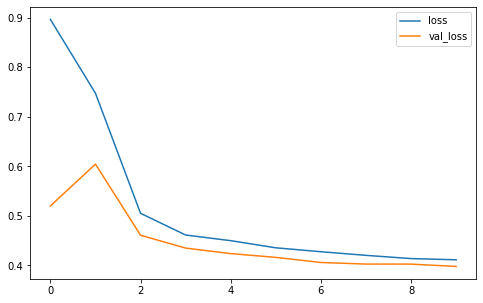

In [77]:
df = pd.DataFrame(history.history)
df.plot(figsize = (8,5))

##Evaluation on test set

In [83]:
mse_test = model.evaluate(x_test,y_test)
mse_test

162/162 [==============================] - 0s 1ms/step - loss: 0.3876


0.3876430094242096

In [84]:
x_new = x_test[:3]
model.predict(x_new)

array([[0.68018824],
       [1.7720973 ],
       [1.3286722 ]], dtype=float32)

In [85]:
y_new = y_test[:3]
y_new

array([0.735, 2.188, 1.411])